In [1]:
# Useful Intution material
#http://mcminis1.github.io/blog/2014/05/10/intuition-for-SVR/

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\jayyanar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Identify the shape of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
# Set the Independent Variable (X) and dependent variable (y) = f(x)=y
## Make sure always X is matrix and Y is vector
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [6]:
y=y.reshape(-1,1)

In [7]:
# Since we are going to use SVR Model to prediction, which is less used, 
#We dont have a algorithm/class written for feature scaling for SVR Model
#So We will perform feature scaling before fitting the model

# Recap on feature scaling, need to scale to fit into matrix for both X and Y values
# Scale both X and Y 

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\jayyanar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
 #Fitting the Regression Model to the dataset
from sklearn.svm import SVR

# Select the kernel type default is rbf, but you can select linear, Poly, Sigmoid, precomputed
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

C:\Users\jayyanar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
# Predicting a new result with Regression
Level_Value = 6.5

# We are doing this because we transform for feature scaling
#transform = sc_X.fit_transform(np.array([Level_Value]))

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[Level_Value]]))))
print ("The Prediction of {} Level salary is ${}".format(Level_Value,np.round(y_pred)))

The Prediction of 6.5 Level salary is $[ 170370.]


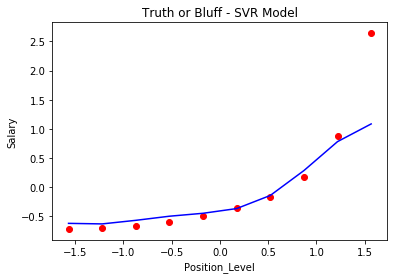

In [14]:
# Visualising the Regression Results
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue') # Use the Linear regression predict method to Predict the X
plt.title("Truth or Bluff - SVR Model")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show()

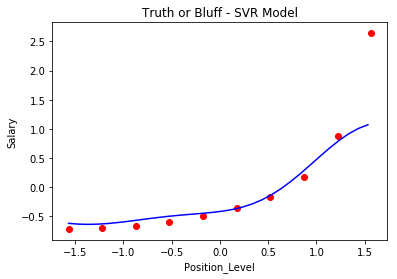

In [15]:
# Visualising the Regression Results for more interval and smoothness in X axis say (0.1) value
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1)) # This help 90 level of salary

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue') # Use the Linear regression predict method to Predict the X
plt.title("Truth or Bluff - SVR Model")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show()